Inicjalizacja

In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import random
 

Konieczne funkcje

In [29]:
#Liczenie odległości między punktami zdefiniowanymi tuplami
def qDist(q1,q2):
     return np.sqrt((q1[0] - q2[0])**2 + (q1[1] - q2[1])**2)
    
#Liczenie potencjału przyciągającego
def Up(qr,qk,kp=2):
    return 0.5*kp*(qDist(qr,qk)**2)

#Liczenie siły przyciągającej
def Fp(qr,qk,kp=1):
    return kp*qDist(qr,qk)-1

#Liczenie potencjału odpychającego od przeszkody
def Vo(qr,qo,ko=2,d0=40):
    if qDist(qr,qo)>d0:
        return 0
    return .5*(ko*(1/qDist(qr,qo)-1/d0)**2)
    
#Liczenie sił odpychających od przeszkody
def Fo(qr,qo,ko=3,d0=40):
    if qDist(qr,qo)>d0:
        return 0
    if qDist(qr,qo) == 0:
        return 10
    return ko*(1/qDist(qr,qo)-1/d0)*(1/(qDist(qr,qo)**2))

#Liczenie sił odpychających tablicy przeszkód dla punktu
def TFo(qr, tp, ko=3, d0=50):
    TFp=0
    for p in tp:
        TFp += (Fo(qr,p,ko,d0))
    return TFp
#Liczenie sumy sił odpychających tablicy przeszkód dla punktu dla ograniczonej widoczności
def TFor(qr, tp, ko=3, d0=50, qr=10):
    TFp=0
    for p in tp:
        if qDist(qr, p)<dr:
            TFp += (Fo(qr,p,ko,d0))
    return TFp

#Liczenie wektora z dwóch punktów
def Vec(q1,q2):
    return (q1[0]-q2[0], q1[1]-q2[1])


#Sprawdzenie czy dwa punkty są mniej więcej obok siebie
def Approx(q1,q2, ap=5):
    if abs(q1[0]-q2[0]) < ap and abs(q1[1]-q2[1]) < ap:
        return True
    return False

Losowanie współrzędnych punktów startowych, końcowych i przeszkód

In [84]:
delta = .1
x_size = 10
y_size = 10
obst_vect = [(random.randint(-10,10), random.randint(-10,10)), 
             (random.randint(-10,10), random.randint(-10,10)),
             (random.randint(-10,10),random.randint(-10,10)),
             (random.randint(-10,10),random.randint(-10,10))]
start_y = random.randint(-10,10)
start_point=(-10,start_y)
finish_y = random.randint(-10,10)
finish_point=(10,finish_y)
print("Start: " + str(start_point))
print("Finish: " + str(finish_point))

x = y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = np.exp(-X**0)


Start: (-10, 1)
Finish: (10, -2)


ko=1, kp=.017, d0=20

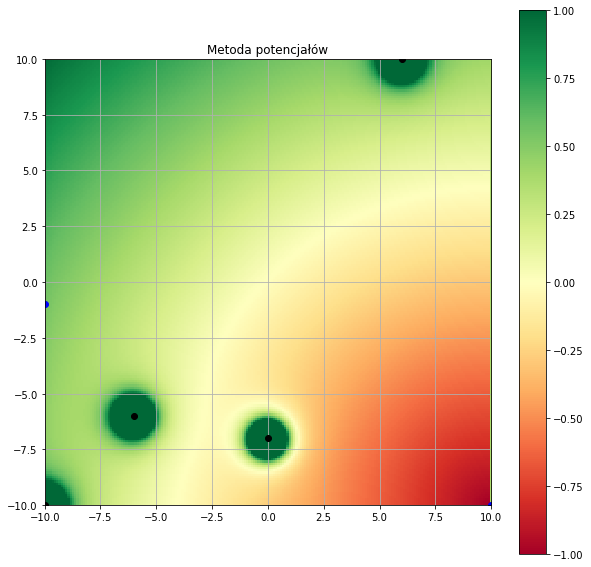

In [4]:
n=0
TFp = TFo(start_point, obst_vect)
TFl = list()
fmp = list()
for pointx in x:
    for pointy in y:
        n+=1
        zpointy=int(pointy/delta+1/delta*10)
        zpointx=int(pointx/delta+1/delta*10)
        Z[zpointx,zpointy] = TFo((pointy,pointx), obst_vect,ko=1, d0=20) + Fp((pointy,pointx), finish_point, kp=.07)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_title('Metoda potencjałów')
plt.imshow(Z, cmap=cm.RdYlGn,
           origin='lower', extent=[-x_size, x_size, -y_size, y_size],
           vmax=1, vmin=-1)

plt.plot(start_point[0], start_point[1], "or", color='blue')
plt.plot(finish_point[0], finish_point[1], "or", color='blue')

for obstacle in obst_vect:
    plt.plot(obstacle[0], obstacle[1], "or", color='black')

plt.colorbar(orientation='vertical')

plt.grid(True)
plt.show()


ko=1, d0=20, kp=.05

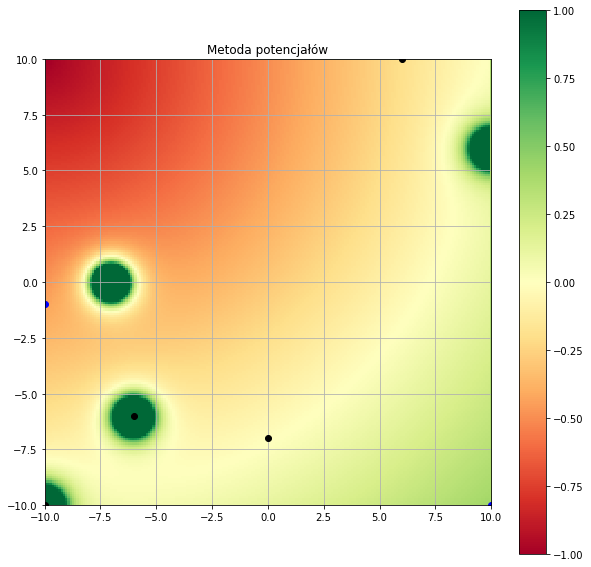

In [5]:
n=0
TFp = TFo(start_point, obst_vect)
TFl = list()
fmp = list()
for pointx in x:
    for pointy in y:
        n+=1
        zpointy=int(pointy/delta+1/delta*10)
        zpointx=int(pointx/delta+1/delta*10)
        Z[zpointx,zpointy] = TFo((pointx,pointy), obst_vect,ko=1, d0=20) + Fp((pointx,pointy), finish_point, kp=.05)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_title('Metoda potencjałów')
plt.imshow(Z, cmap=cm.RdYlGn,
           origin='lower', extent=[-x_size, x_size, -y_size, y_size],
           vmax=1, vmin=-1)

plt.plot(start_point[0], start_point[1], "or", color='blue')
plt.plot(finish_point[0], finish_point[1], "or", color='blue')

for obstacle in obst_vect:
    plt.plot(obstacle[0], obstacle[1], "or", color='black')

plt.colorbar(orientation='vertical')

plt.grid(True)
plt.show()

Wniosek: Kp reguluje gradient pomiędzy punktem startowym a końcowym

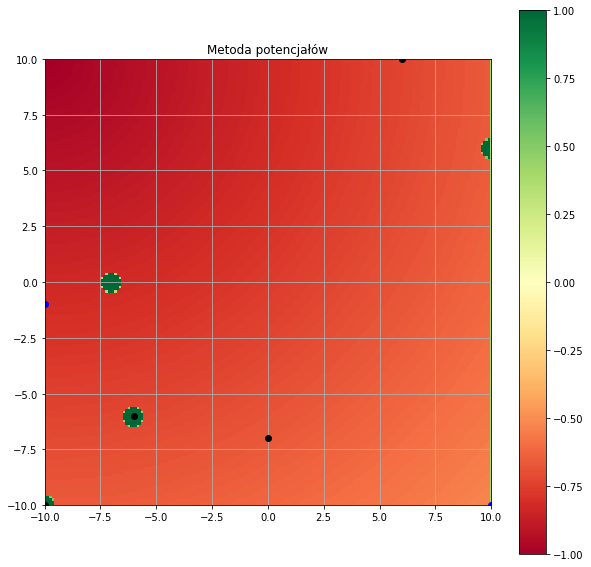

In [6]:
n=0
TFp = TFo(start_point, obst_vect)
TFl = list()
fmp = list()
for pointx in x:
    for pointy in y:
        n+=1
        zpointy=int(pointy/delta+1/delta*10)
        zpointx=int(pointx/delta+1/delta*10)
        Z[zpointx,zpointy] = TFo((pointx,pointy), obst_vect,ko=1, d0=.5) + Fp((pointx,pointy), finish_point, kp=.017)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_title('Metoda potencjałów')
plt.imshow(Z, cmap=cm.RdYlGn,
           origin='lower', extent=[-x_size, x_size, -y_size, y_size],
           vmax=1, vmin=-1)

plt.plot(start_point[0], start_point[1], "or", color='blue')
plt.plot(finish_point[0], finish_point[1], "or", color='blue')

for obstacle in obst_vect:
    plt.plot(obstacle[0], obstacle[1], "or", color='black')

plt.colorbar(orientation='vertical')

plt.grid(True)
plt.show()


Wniosek: d0 ogranicza promień gradientu odchodzącego z przeszkód

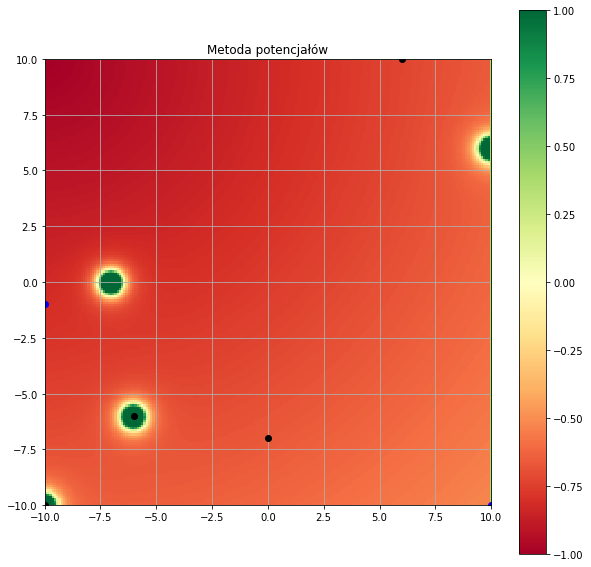

In [7]:
n=0
TFp = TFo(start_point, obst_vect)
TFl = list()
fmp = list()
for pointx in x:
    for pointy in y:
        n+=1
        zpointy=int(pointy/delta+1/delta*10)
        zpointx=int(pointx/delta+1/delta*10)
        Z[zpointx,zpointy] = TFo((pointx,pointy), obst_vect,ko=.2, d0=20) + Fp((pointx,pointy), finish_point, kp=.017)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_title('Metoda potencjałów')
plt.imshow(Z, cmap=cm.RdYlGn,
           origin='lower', extent=[-x_size, x_size, -y_size, y_size],
           vmax=1, vmin=-1)

plt.plot(start_point[0], start_point[1], "or", color='blue')
plt.plot(finish_point[0], finish_point[1], "or", color='blue')

for obstacle in obst_vect:
    plt.plot(obstacle[0], obstacle[1], "or", color='black')

plt.colorbar(orientation='vertical')

plt.grid(True)
plt.show()


Wniosek: Ko definiuje gradient od przeszkody

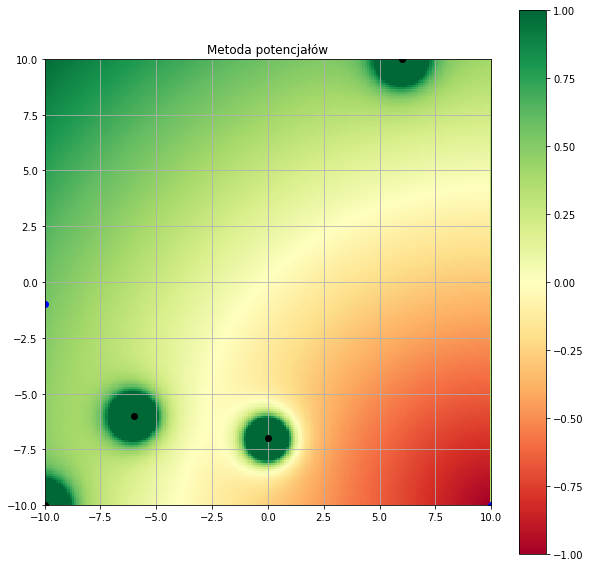

In [ ]:
def FindMinAround(start_point, table,  obst, step=1, delta=.1, qr=50, ko=1.2, d0=20, kp=0.07):
    
    index = point = (start_point[1],start_point[0])
    minval = 100

    try:
        if minval > (table[point[0],point[1]-step] + TFor((point[0],point[1]-step),obst_vect, ko, d0, qr)) :
            minval = table[point[0],point[1] -step]
            index = (point[0], point[1]-step)
    except IndexError:
        pass
    try:
        if minval > table[point[0]-step,point[1]-step]  + TFor((point[0] - step,point[1]-step),obst_vect,ko,d0,qr):
            minval = table[point[0]-step,point[1] -step]
            index = (point[0]-step, point[1]-step)
    except IndexError:
        pass
    try:
        if minval > table[point[0]-step,point[1]]  + TFor((point[0] - step,point[1]),obst_vect,ko,d0,qr):
            minval = table[point[0]-step,point[1]]
            index = (point[0]-step, point[1])
    except IndexError:
        pass
    try:
        if minval > table[point[0]+step,point[1]]  + TFor((point[0]+step,point[1]),obst_vect,ko,d0,qr):
            minval = table[point[0]+step,point[1]]
            index = (point[0]+step, point[1])
    except IndexError:
        pass
    try:
        if minval > table[point[0]+step,point[1]+step]  + TFor((point[0]+step,point[1]+step),obst_vect,ko,d0,qr):
            minval = table[point[0]+step,point[1]+step] 
            index = (point[0]+step, point[1]+step)
    except IndexError:
        pass

    try:
        if minval > table[point[0]+step,point[1]-step]  + TFor((point[0]+step,point[1]-step),obst_vect,ko,d0,qr):
            minval = table[point[0]+step,point[1]-step]
            index = (point[0]+step, point[1]-step)
    except IndexError:
        pass
    
    try:
        if minval > table[point[0]-step,point[1]+step]  + TFor((point[0]-step,point[1]+step),obst_vect,ko,d0,qr):
            minval = table[point[0]-step,point[1]+step]
            index = (point[0]-step, point[1]+step)
    except IndexError:
        pass
    index = (index[1], index[0])
    print(index)
    return index
    
def FindPath(point, finish_point, Z, obst_vect, step=50):
    moves = list()
    moves.append(point)
    current = point
    while not Approx(current, finish_point, 5):
        current = FindMinAround(current, Z, obst_vect, step=step)
        moves.append(current)
    return moves


In [ ]:
point = (int(start_point[0]/delta+101), int(start_point[1]/delta+101))
finish = (int(finish_point[0]/delta+101), int(finish_point[1]/delta+101))
for pointx in x:
    for pointy in y:
        n+=1
        zpointy=int(pointy/delta+1/delta*10)
        zpointx=int(pointx/delta+1/delta*10)
        Z[zpointx,zpointy] = Fp((pointx,pointy), finish_point, kp=.05)

moves = FindPath(point, finish, tab, obst_vect, step=1)

In [88]:
finish

(201, 81)

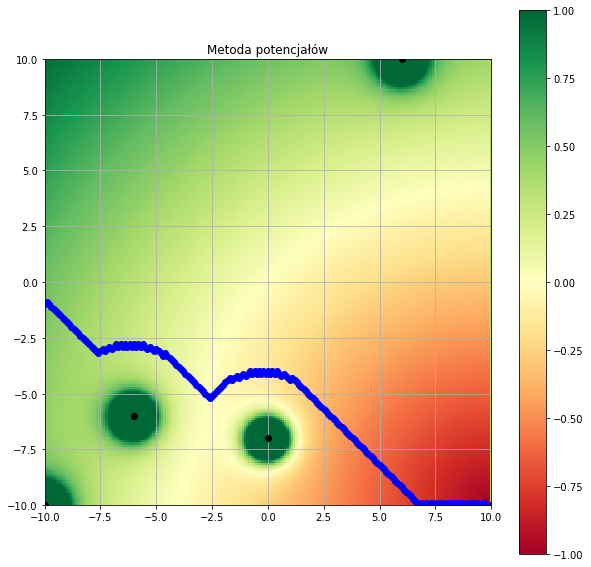

In [83]:

TFp = TFo(start_point, obst_vect)
TFl = list()
fmp = list()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_title('Metoda potencjałów')
plt.imshow(Z, cmap=cm.RdYlGn,
           origin='lower', extent=[-x_size, x_size, -y_size, y_size],
           vmax=1, vmin=-1)

plt.plot(start_point[0], start_point[1], "or", color='blue')
plt.plot(finish_point[0], finish_point[1], "or", color='blue')
moves2 = [((i[0]*delta-10), (i[1]*delta-10)) for i in moves]
for move in moves2:
    plt.plot(move[0], move[1], "or", color='blue')
    n=0
for obstacle in obst_vect:
    plt.plot(obstacle[0], obstacle[1], "or", color='black')

plt.colorbar(orientation='vertical')

plt.grid(True)
plt.show()

In [76]:
start_point

(-10, -1)

In [ ]:
try:
    a=1
except ValidationError:
    pass


In [16]:
Z[91,1]

0.5387623880044072